# Análise de personalidade de clientes

Nesse projeto será realizada uma aplicação de **machine learning** para a segmentação de clientes baseado na técnica de clusterização, cujo a abordagem utiliza um **modelo de aprendizado não-supervisionado** para dividir em agrupamentos os dados que possuam características diferentes.

## Estrutura de projeto

A estrutura **CRISP-DM** foi utilizada como base para desenvolver esse trabalho, realizando a seguinte metodologia:


    
    
<b>1. Definir o problema de negócio.</b><br>
<b>2. Coletar os dados e realizar análises preliminares dos mesmos.</b><br>
<b>3. Aplicar etapas de pré-processamento: filtragem, tratamentos de dados e criação de *features*.</b><br> 
<b>4. Realizar uma análise exploratória dos dados, detecção e remoção de outliers.</b><br>
<b>5. Preparação dos dados para o modelo. </b><br>
<b>6. Divisão de clusters.</b><br>
<b>7. Escolha do número ótimo de clusters.</b><br>
<b>8. Testes no modelo final, avaliação e interpretação dos resultados.</b><br>
<b>9. Implementar modelo.</b><br>

## Descrição do notebook

Neste notebook serão realizadas técnicas para a **preparação dos dados** com o objetivo de serem aplicados ao modelo de forma eficaz.

# Preparando bibliotecas e configurações do notebook

In [1]:
import sys
import os

# Caminho até a raiz do projeto
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Adiciona o caminho ao path
if project_root not in sys.path:
    sys.path.append(project_root)

from config import BASE_DIR

from src.preparation import *
from src.utils_EDA import set_graph_configs
from src.preprocessing import carregar_dados


In [2]:
set_graph_configs()

In [3]:
# Carregando dados
path = f'{BASE_DIR}\\data\\processed\\marketing_campaign_processed.csv'

df = carregar_dados(path,parse_dates=None,sep=',',drop_col=['Unnamed: 0'])
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Promos_Total,Age,Dependants,Has_minor,Partner,House_members,Income_per_members,Total_spent
0,Graduate,58138.0,0,0,2 Meses,635,88,546,172,88,...,0,1,0,Idosos,0,0,1,2,29069.000000,1617
1,Graduate,46344.0,1,1,2 Meses,11,1,6,2,1,...,0,0,0,Idosos,2,1,1,4,11586.000000,27
2,Graduate,71613.0,0,0,1 Mes,426,49,127,111,21,...,0,0,0,Meia-idade,0,0,1,2,35806.500000,776
3,Graduate,26646.0,1,0,1 Mes,11,4,20,10,3,...,0,0,0,Adultos,1,1,1,3,8882.000000,53
4,Postgraduate,58293.0,1,0,> 3 Meses,173,43,118,46,27,...,0,0,0,Adultos,1,1,0,2,29146.500000,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Graduate,61223.0,0,1,2 Meses,709,43,182,42,118,...,0,0,0,Meia-idade,1,1,0,2,30611.500000,1341
2201,Postgraduate,64014.0,2,1,2 Meses,406,0,30,0,0,...,0,0,1,Idosos,3,1,1,5,12802.800000,444
2202,Graduate,56981.0,0,0,> 3 Meses,908,48,217,32,12,...,0,0,1,Adultos,0,0,0,1,56981.000000,1241
2203,Postgraduate,69245.0,0,1,1 Mes,428,30,214,80,30,...,0,0,0,Idosos,1,1,1,3,23081.666667,843


# 5. Preparação dos dados

## 5.1 Transformando features incompatíveis com o modelo

Features com dados em formatos de *strings* e nulos acarretam na **falha no funcionamento dos modelos** de aprendizado de máquina, tendo em vista que todos necessitam de entradas numéricas para realizar suas operações de cálculos internos. Com isso é realizado uma verificação antes de realizar demais operações que necessitem de valores matemáticos em **todo conjunto de dados analisado**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Income               2205 non-null   float64
 2   Kidhome              2205 non-null   int64  
 3   Teenhome             2205 non-null   int64  
 4   Recency              2205 non-null   object 
 5   MntWines             2205 non-null   int64  
 6   MntFruits            2205 non-null   int64  
 7   MntMeatProducts      2205 non-null   int64  
 8   MntFishProducts      2205 non-null   int64  
 9   MntSweetProducts     2205 non-null   int64  
 10  MntGoldProds         2205 non-null   int64  
 11  NumDealsPurchases    2205 non-null   int64  
 12  NumWebPurchases      2205 non-null   int64  
 13  NumCatalogPurchases  2205 non-null   int64  
 14  NumStorePurchases    2205 non-null   int64  
 15  NumWebVisitsMonth    2205 non-null   i

In [5]:
df_preparation = convert_object_to_num(df)
df_preparation

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Promos_Total,Age,Dependants,Has_minor,Partner,House_members,Income_per_members,Total_spent
0,1,58138.0,0,0,1,635,88,546,172,88,...,0,1,0,3,0,0,1,2,29069.000000,1617
1,1,46344.0,1,1,1,11,1,6,2,1,...,0,0,0,3,2,1,1,4,11586.000000,27
2,1,71613.0,0,0,0,426,49,127,111,21,...,0,0,0,2,0,0,1,2,35806.500000,776
3,1,26646.0,1,0,0,11,4,20,10,3,...,0,0,0,1,1,1,1,3,8882.000000,53
4,2,58293.0,1,0,3,173,43,118,46,27,...,0,0,0,1,1,1,0,2,29146.500000,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1,61223.0,0,1,1,709,43,182,42,118,...,0,0,0,2,1,1,0,2,30611.500000,1341
2201,2,64014.0,2,1,1,406,0,30,0,0,...,0,0,1,3,3,1,1,5,12802.800000,444
2202,1,56981.0,0,0,3,908,48,217,32,12,...,0,0,1,1,0,0,0,1,56981.000000,1241
2203,2,69245.0,0,1,0,428,30,214,80,30,...,0,0,0,3,1,1,1,3,23081.666667,843


## 5.2 Escalonamento

In [6]:
# Todas as variáveis consideradas categóricas
all_cat = ['Age','Recency','Promos_Total','Education','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
           'AcceptedCmp2', 'Complain', 'Response', 'Partner','Kidhome', 'Teenhome','Dependants','Has_minor','House_members']

# Todas as variáveis categóricas utilizadas
cat_used = ['Age','Recency','Promos_Total','Education','Complain', 'Response', 'Partner','Kidhome', 'Teenhome']



df_scaled, num_c = escalonar_dados(df_preparation,all_cat,cat_used,load_file=False)
df_scaled

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Total_spent,Age,Recency,Promos_Total,Education,Complain,Response,Partner,Kidhome,Teenhome
0,0.314651,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,...,1.679323,3,1,0,1,0,1,1,0,0
1,-0.254877,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,...,-0.963897,3,1,0,1,0,0,1,1,1
2,0.965354,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,...,0.281242,2,0,0,1,0,0,1,0,0
3,-1.206087,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,...,-0.920675,1,0,0,1,0,0,1,1,0
4,0.322136,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,...,-0.307248,1,3,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,0.126750,...,1.220500,2,1,0,1,0,0,0,0,1
2201,0.598401,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,-0.230646,...,-0.270675,3,1,1,2,0,0,1,2,1
2202,0.258780,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,0.126750,...,1.054260,1,3,1,1,0,0,0,0,0
2203,0.851004,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,0.841543,...,0.392623,3,0,0,2,0,0,1,0,1


## 5.3 Redução de dimensionalidade

Os modelos de aprendizado de máquina, sejam eles supervisionados ou não, possuem um custo computacional elevado quando se trata de estabelecer relações entre **diversas features** nos dados, isso pode acarretar em problemas indesejados:

<b>1. Aumento do uso do poder de processamento da máquina, deixando outras operações lentas;</b><br>
<b>2. A capacidade de aprendizado para um conjunto de dados genérico é otimizada;</b><br>
<b>3. Reduz o impacto de outliers e ruídos, assim como features redundantes que podem introduzir viéses no modelo.</b><br>


### 5.2 PCA (Principal Component Analysis)

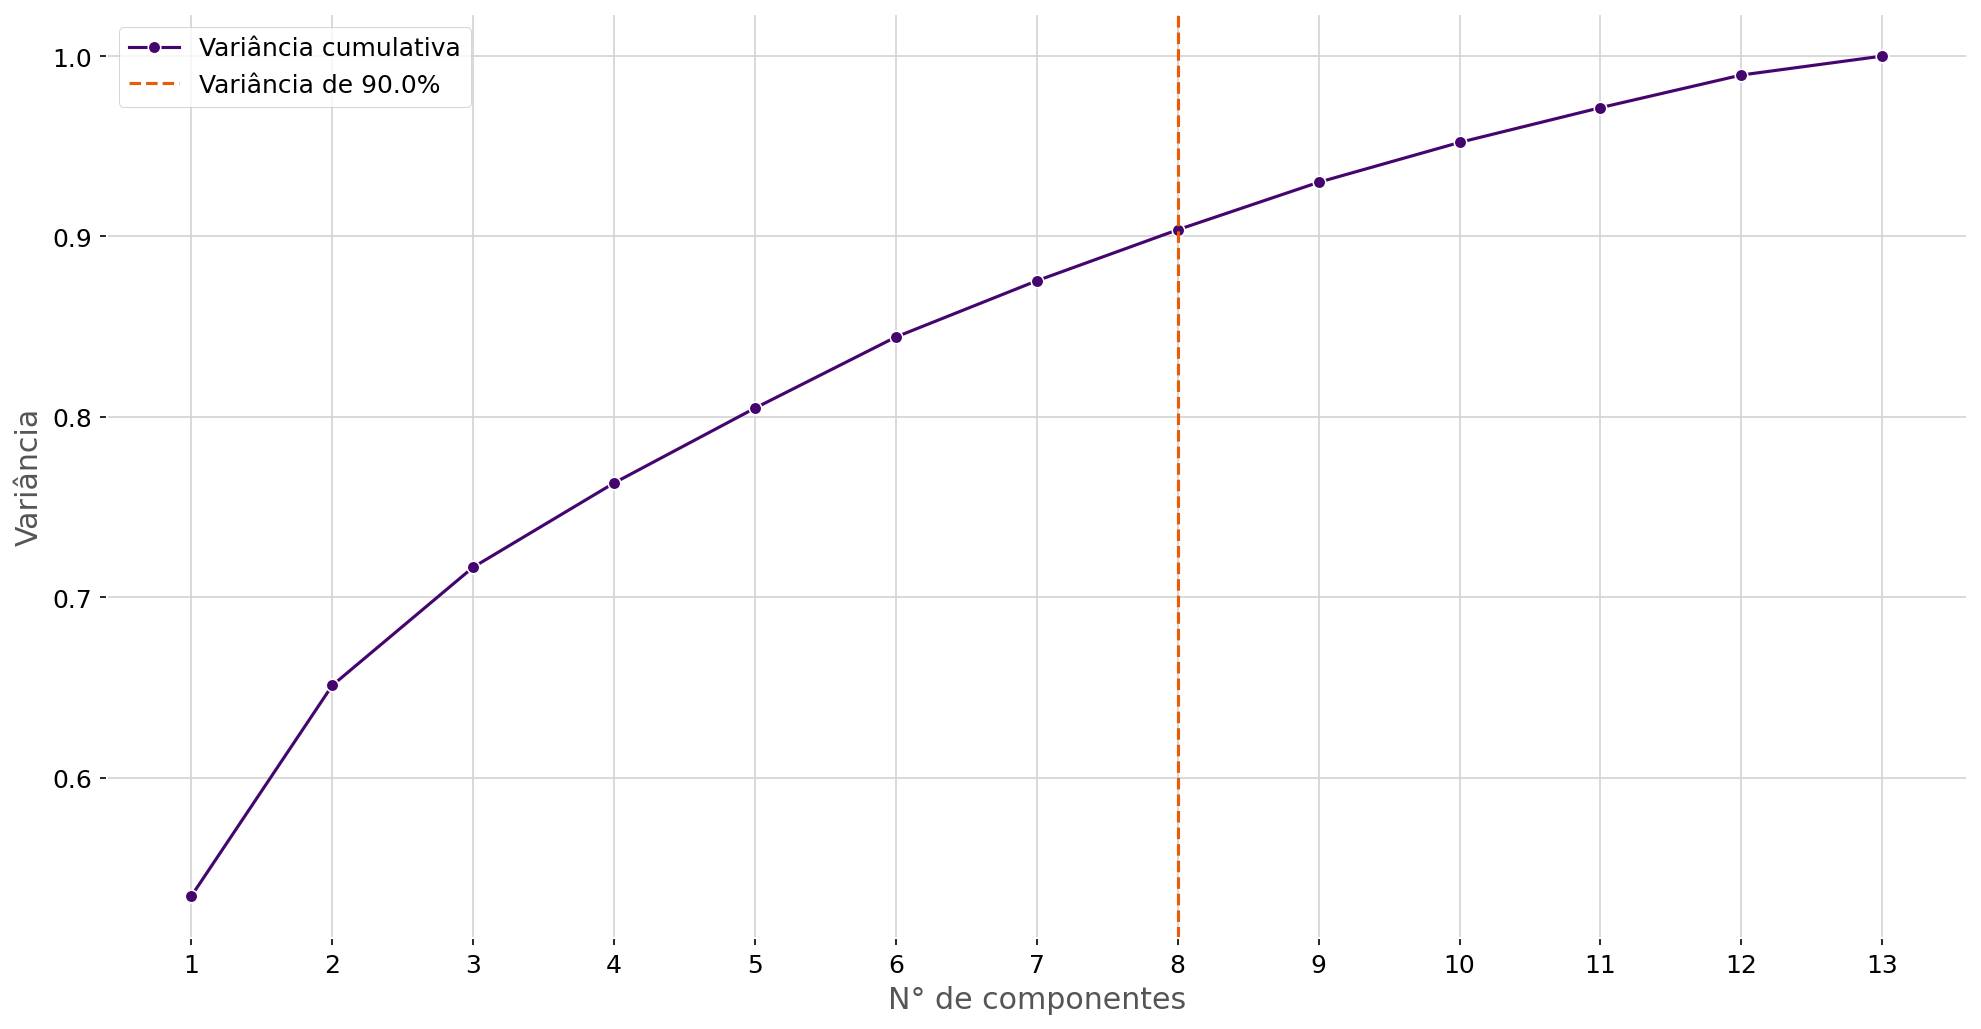

,Age,Recency,Promos_Total,Education,Complain,Response,Partner,Kidhome,Teenhome,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,3,1,0,1,0,1,1,0,0,3.893245,0.919139,1.897846,-0.195790,1.897724,1.530684,0.354420,0.591771
1,3,1,0,1,0,0,1,1,1,-2.450677,-0.959091,-0.208559,-0.015489,-0.369168,0.299646,0.163852,-0.126169
2,2,0,0,1,0,0,1,0,0,1.780034,0.098266,-0.138499,-0.209312,-0.104280,-1.593645,-0.696187,1.218860
3,1,0,0,1,0,0,1,1,0,-2.665160,-0.518017,0.120642,-0.193067,-0.101150,-0.032547,-0.138484,0.174025
4,1,3,0,2,0,0,0,1,0,-0.035347,0.725383,0.305126,-1.026773,-0.725825,0.185248,-0.034450,-0.160810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2,1,0,1,0,0,0,0,1,2.792573,1.458689,1.811410,2.629474,0.654301,-0.989411,1.511440,-1.132134
2201,3,1,1,2,0,0,1,2,1,-1.020462,2.777711,-0.678505,-0.906058,-0.398214,0.117801,0.321394,-0.114214
2202,1,3,1,1,0,0,0,0,0,1.875504,-0.197351,-1.638707,-0.311773,0.256241,-0.162036,-1.467059,0.075352
2203,3,0,0,2,0,0,1,0,1,1.832444,0.215272,-0.308112,0.011207,-0.808014,-0.456038,-0.151479,0.772977


In [7]:
df_preparation_reducted = dimensionality_reduction(df_scaled,num_c,cat_used,
                                                   .9,False,
                                                   plot_graph=True)
df_preparation_reducted

In [8]:
path_final = f'{BASE_DIR}\\data\\prepared\\marketing_campaign_prepared.csv'
df_preparation_reducted.to_csv(path_final)